# 가설검정

## compact 자동차와 suv 자동차의 연비 t 검정
* t 검정 두 집단의 평균에 통계적으로 유의한 차이가 있는지 확인하는 기법

In [2]:
import pandas as pd

mpg = pd.read_csv('./files/mpg.csv')

#기술 통계 분석 

# compact 자동차와 suv 자동차의 빈도와 cty 평균 구하기
# compact, suv 추출하기
# category별 분리
# 빈도 구하기
# cty 평균 구하기
mpg.query('category in ["compact", "suv"]') \
    .groupby('category', as_index=False) \
    .agg(n=('category', 'count'),
         mean=('cty', 'mean'))

,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


In [7]:
# compact와 suv의 cty 추출 
compact = mpg.query('category == "compact"')['cty']
suv = mpg.query('category == "suv"')['cty']


In [8]:
# t검정
# equal_var 집단간 분산이 같다
# pvalue : 유의확률 5%이하면 우연일 확률이 낮다는 #
from scipy import stats
stats.ttest_ind(compact, suv, equal_var = True)

TtestResult(statistic=11.917282584324107, pvalue=2.3909550904711286e-21, df=107.0)

# 일반 휘발유와 고급 휘발유의 도시연비 t 검정

In [9]:
## 일반 휘발유를 사용하는 자동차와 고급 휘발유를 사용하는 자동차의 도시 연비 차이가 유의한지 확인

# fl : r : 일반 휘발유, p : 고급휘발유
# fl별 분리
# 빈도 구하기
# cty 평균 구하기
mpg.query('fl in ["r", "p"]') \
   .groupby('fl', as_index = False) \
   .agg(n    = ('category', 'count'),
        mean = ('cty', 'mean'))

,fl,n,mean
0,p,52,17.365385
1,r,168,16.738095


In [10]:
#p value가 5%보다 크기때문에 우연일 확률이 높다 통계적으로 유의하지 않다
regular = mpg.query('fl == "r"')['cty']
premium = mpg.query('fl == "p"')['cty']

# t-test
stats.ttest_ind(regular, premium, equal_var = True)

TtestResult(statistic=-1.066182514588919, pvalue=0.28752051088667024, df=218.0)

# 상관분석 - 두 변수의 관계 분석하기
* 상관분석 : 두 연속 변수가 서로 관련이 있는지 검정하는 통계 분석 기법
* 1과 가까울수록 관련성이 크다
* 양수면 정비례 음수면 반비례

## 실업자 수와 개인 소비 지출의 상관관계

In [11]:
#unemploy(실업자수) 와 pce(개인소비지출)의 상관관계

# economics 데이터 불러오기
economics = pd.read_csv('./files/economics.csv')

# 상관행렬 만들기 corr를 이용해 구한다
# 상관계수 0.61 정비례 관계
economics[['unemploy', 'pce']].corr()

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


In [14]:
# 상관 분석
# states.pearsonr() 를 이융해 유의확률 구하기
# statistic : 상관계수 pvalue : 유의확률
#유의확률이 0.05 미만이므로 (e-61 = 61자리만큼 소수점 이동하는거..) 실업자 수와 개인 소비 지출의 상관관계가 통계적으로 유의하
stats.pearsonr(economics['unemploy'], economics['pce'])

PearsonRResult(statistic=0.6145176141932083, pvalue=6.77352730328938e-61)

# 상관행렬 히트맵 만들기
* 여러 변수의 관련성을 한꺼번에 알아보고 싶을 때 모든 변수의 상관관계를 나타낸 상관행렬을 만들면 된다

In [19]:
# mtcars : 자동차
mtcars = pd.read_csv('./files/mtcars.csv')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [21]:
#각 변수끼리 얼마나 관련있는지 확인 가능
# 연비 mpg 가 실린더 cyl 열이 교차되는 부분이 0.85 -> 연비가 높을 수록 실린더 수가 적다
# 실린더 수과 wt 무게의 상관계수가 0.78 실린더 수가 많을 수록 자동차가 무겁다
car_cor = mtcars.corr()      # 상관행렬 만들기
car_cor = round(car_cor, 2)  # 소수점 둘째 자리까지 반올림
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


In [25]:
# 히트맵 만들기
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '120',           # 해상도 설정
                     'figure.figsize': [7.5, 5.5]})  # 가로 세로 크기 설정

<Axes: >

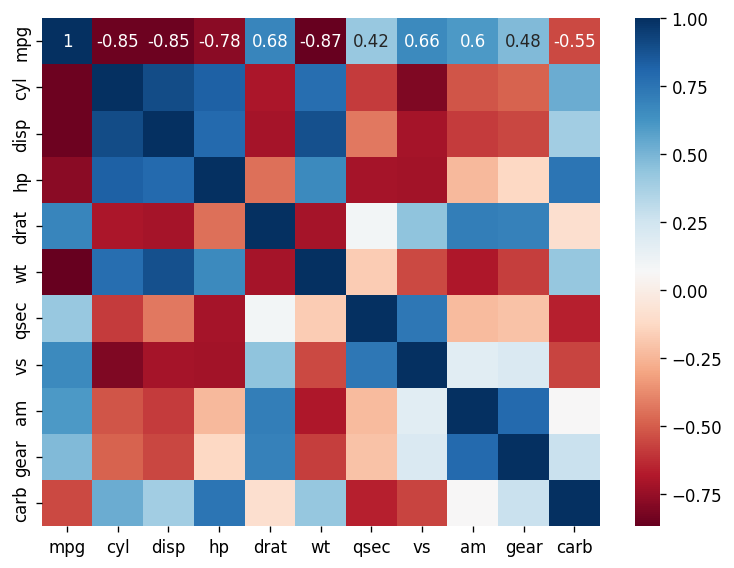

In [26]:
# 히트맵 만들기
import seaborn as sns
sns.heatmap(car_cor,
            annot = True,   # 상관계수 표시
            cmap = 'RdBu')  # 컬러맵

In [27]:
# 대각 행렬 제거하기 - 대각선 기준으로 왼쪽 아래와 오른쪽위의 값이 대칭해서 중복되기 때문에 중복된 부분 제거하기

# mask 만들기
import numpy as np
# 0으로 채운 배열 만들기
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
# triu_indices_from(mask) 배열의 오른쪽 위 인덱스를 구함
# 오른쪽 위 대각 행렬을 1로 바꾸기
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

/Library/Python/3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

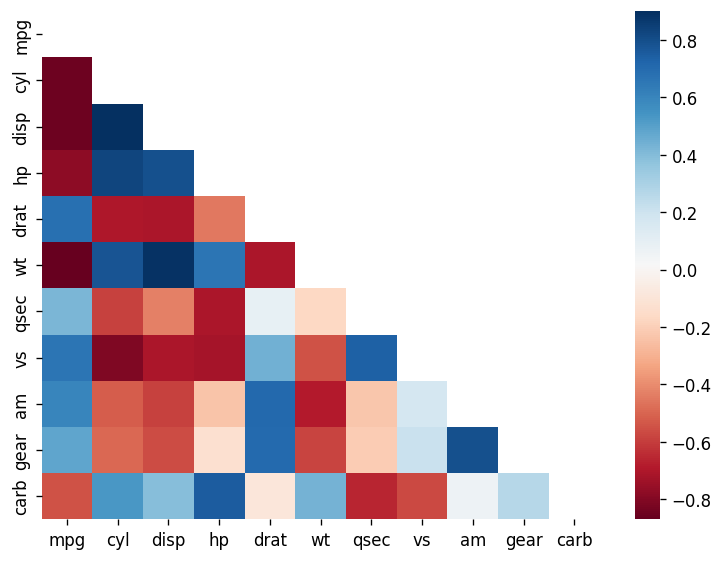

In [29]:
# 히트맵 만들기
sns.heatmap(data = car_cor,
            annot = True,   # 상관계수 표시
            cmap = 'RdBu',  # 컬러맵
            mask = mask)    # mask 적용

/Library/Python/3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

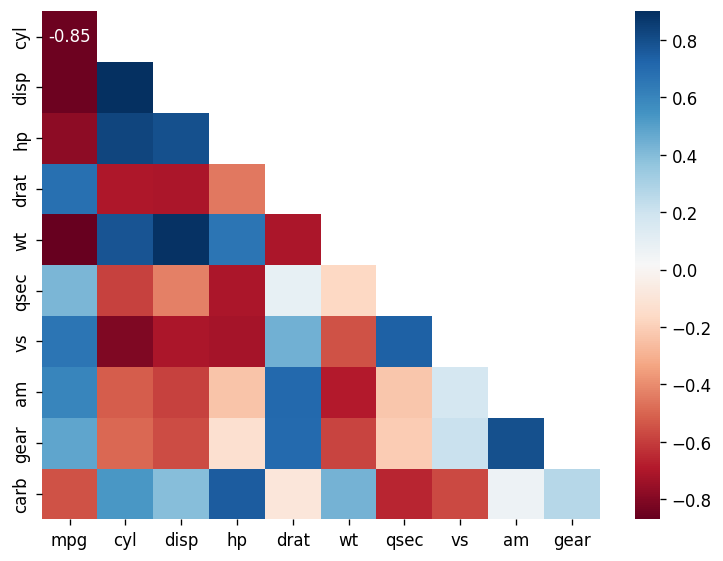

In [31]:
# 빈 행과 열 제거하기
# 왼쪽 위 오른쪽 아레 에는 아무 값도 없기 때문에 (항상 1이 되는 위치) 값을 표현하지 않음 -> 제거하기

mask_new = mask[1:, :-1]         # mask 첫 번째 행, 마지막 열 제거
cor_new = car_cor.iloc[1:, :-1]  # 상관행렬 첫 번째 행, 마지막 열 제거

# 히트맵 만들기
sns.heatmap(data = cor_new,
            annot = True,       # 상관계수 표시
            cmap = 'RdBu',      # 컬러맵
            mask = mask_new)    # mask 적용

/Library/Python/3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

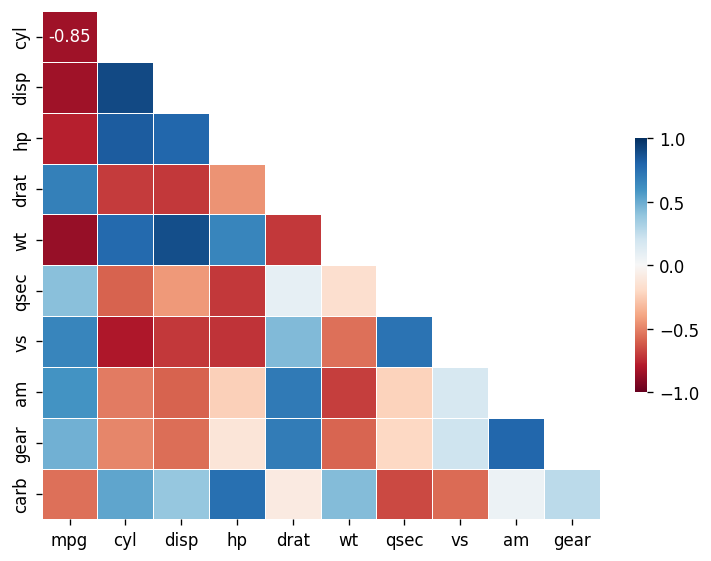

In [32]:
# 향상된 히트맵 만들기
sns.heatmap(data = cor_new,
            annot = True,               # 상관계수 표시
            cmap = 'RdBu',              # 컬러맵
            mask = mask_new,            # mask 적용
            linewidths = .5,            # 경계 구분선 추가
            vmax = 1,                   # 가장 진한 파란색으로 표현할 최대값
            vmin = -1,                  # 가장 진한 빨간색으로 표현할 최소값
            cbar_kws = {'shrink': .5})  # 범례 크기 줄이기